# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [27]:
import torch
from torchvision import datasets, transforms
import helper
from torch import optim
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import time

In [1]:

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


Here we can see one of the images.

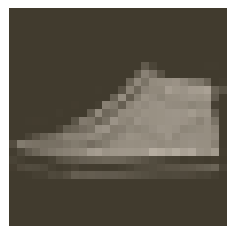

In [11]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [32]:
# TODO: Define your network architecture here
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                       nn.LogSoftmax(dim=1)
                      )
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [33]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [34]:
# TODO: Train the network here
tmps1=time.time()
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)    
        optimizer.zero_grad() 
        output = model(images) #forward
        loss = criterion(output, labels)
        running_loss += loss.item()
        loss.backward() 
        optimizer.step() #update weights

    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
tmps2=time.time()-tmps1
print ("Temps d'execution = %f secondes" %tmps2)        

Training loss: 0.5234385062255331
Training loss: 0.37817959342874696
Training loss: 0.337705388466623
Training loss: 0.31113059021262474
Training loss: 0.2929525708418284
Temps d'execution = 76.748313 secondes


In [35]:
print(torch.cuda.current_device())
device = torch.device("cuda:0")
print(device) 
torch.cuda.get_device_name(0)

0
cuda:0


'GeForce GTX 960M'

In [36]:
if device:
    model.to(device)
    print("Transf GPU")
print("Transf")

Transf GPU
Transf


In [37]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [38]:
# TODO: Train the network here on GPU
tmps1=time.time()
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.shape[0], -1)    
        optimizer.zero_grad() 
        output = model(images) #forward
        loss = criterion(output, labels)
        running_loss += loss.item()
        loss.backward() 
        optimizer.step() #update weights

    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
tmps2=time.time()-tmps1
print ("Temps d'execution = %f secondes" %tmps2)

Training loss: 0.2773793213117097
Training loss: 0.26425095696026074
Training loss: 0.2500406239173814
Training loss: 0.2378515375853538
Training loss: 0.22785291412491787
Temps d'execution = 71.621912 secondes


In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

RuntimeError: Expected object of backend CUDA but got backend CPU for argument #4 'mat1'